In [2]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
#Reading the train dataset from the directory
df=pd.read_csv('train_v9rqX0R.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(8523, 12)

In [6]:
#Finding the data type of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Finding the summary Statistics for numerical columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#Checking the unique values in the dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

DATA PREPROCESSING

In [9]:
# Calculating and printing counts of non-null values
non_null_counts = df.count()
print("\nCounts of Non-Null Values:")
print(non_null_counts)



Counts of Non-Null Values:
Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64


PLEASE NOTE THAT THE DATASET HAS MISSING VALUES. 

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [11]:
#Check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
#Removing Item_Identifier and Outlet_Identifier as they are containing unique identifiers for items and outlets 
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [13]:
#Print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

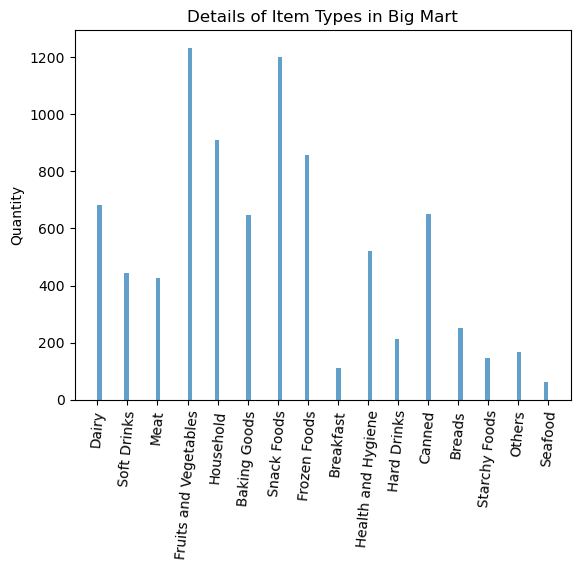

In [14]:
#Plotting the graph of quantity of each items
plt.hist(df['Item_Type'], bins=100 , alpha=0.7)
plt.ylabel('Quantity')
plt.title('Details of Item Types in Big Mart')
plt.xticks(rotation=85)
plt.show()




In [15]:
#Combine item_fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

CREATION OF NEW ATTRIBUTES

In [16]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [17]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [18]:
df.loc[df['New_Item_Type']== 'Non-Consumable','Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()


Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

NORMALIZING DATA

In [19]:
#Create small values for establishment_year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


FILLING NULL VALUES

In [21]:
#Reading the test dataset from the directory
df_test=pd.read_csv('test_AbJTz2l.csv')

In [22]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [23]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [24]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [25]:
#For train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Item_Type              8523 non-null   object 
 13  Outlet_Years               8523 non-null   int64

In [26]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
New_Item_Type                   0
Outlet_Years                    0
dtype: int64

In [27]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [28]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

AS ITEM_WEIGHT IS A NUMERICAL COLUMN, FILLING THE NULL VALUES USING ITS CORRESPONDING COLUMN'S MEAN VALUE.
MEAN = 12.857645


In [29]:
#Filling the missing value directly in the original  train Dataframe
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
#Filling the missing value directly in the original  test Dataframe
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [30]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
New_Item_Type                   0
Outlet_Years                    0
dtype: int64

In [31]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [32]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [33]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

AS OUTLET_SIZE IS A CATEGORICAL COLUMN, FILLING THE NULL VALUES USING ITS CORRESPONDING COLUMN'S MODE VALUE

In [34]:
#Filling null values directly in the original train Dataframe
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)
#Filling null values directly in the original test Dataframe
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [35]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
New_Item_Type                0
Outlet_Years                 0
dtype: int64

SELECTING FEATURES BASED ON GENERAL REQUIREMENTS.

In [36]:
#Removing Item_Identifier and Outlet_Identifier as they are containing unique identifiers for items and outlets
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [37]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,8.93,Non-Edible,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


EXPLORATORY DATA  ANALYSIS (EDA)  

C:\Users\94774\AppData\Local\Temp\ipykernel_15116\1001071604.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

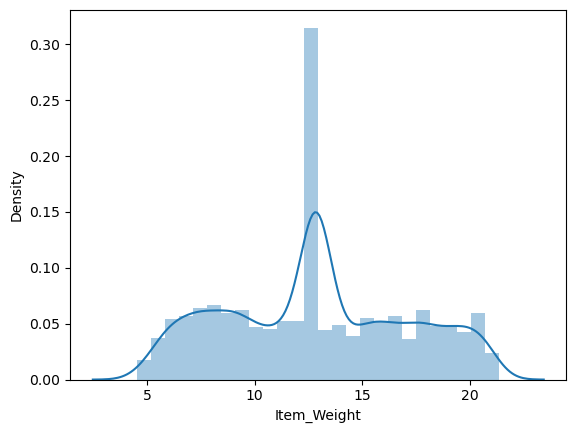

In [38]:
sns.distplot(df['Item_Weight'])

C:\Users\94774\AppData\Local\Temp\ipykernel_15116\852521860.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


<Axes: xlabel='Item_Visibility', ylabel='Density'>

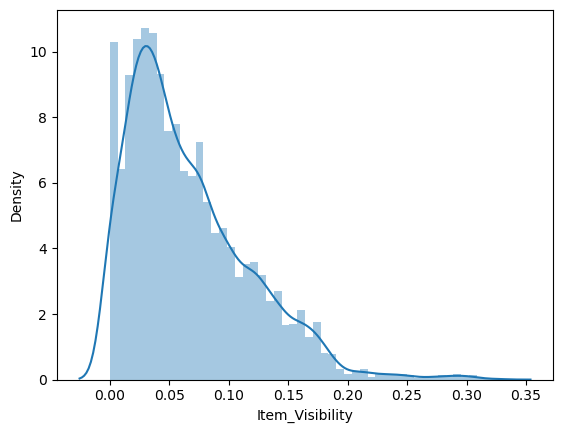

In [39]:
sns.distplot(df['Item_Visibility'])

C:\Users\94774\AppData\Local\Temp\ipykernel_15116\3329567677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

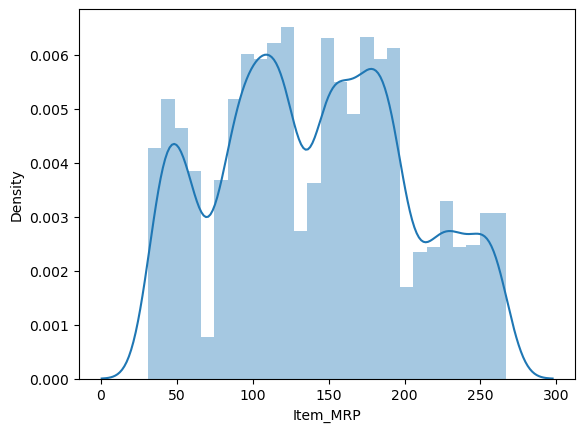

In [40]:
sns.distplot(df['Item_MRP'])

C:\Users\94774\AppData\Local\Temp\ipykernel_15116\1265494514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

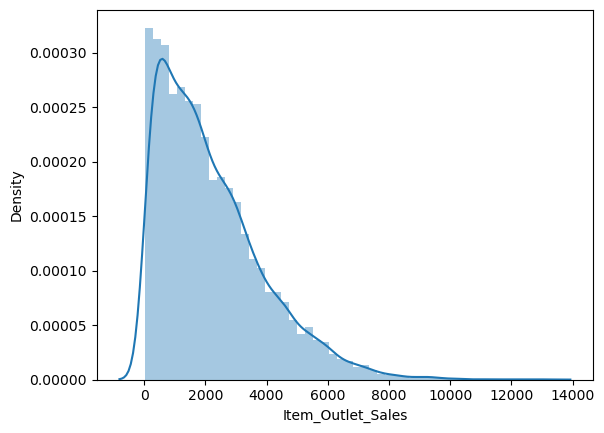

In [41]:
sns.distplot(df['Item_Outlet_Sales'])

IF THERE IS ANY OUTLIERS IN NUMERICAL DATAS WE SHOULD USE MEADIAN VALUES INSTEAD OF MEAN VALUES FOR FILLING NULL VALUES

EDA WITH DTALE LIBRARY

In [42]:
import dtale

In [43]:
dtale.show(df)

In [44]:
#pip install pandas-profiling==2.12.0


In [45]:
#from pandas_profiling import ProfileReport

In [46]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012049  0.024756   
Item_Visibility              -0.012049         1.000000 -0.001315   
Item_MRP                      0.024756        -0.001315  1.000000   
Outlet_Establishment_Year    -0.008301        -0.074834  0.005020   
Item_Outlet_Sales             0.011550        -0.128625  0.567574   
Outlet_Years                  0.008301         0.074834 -0.005020   

                           Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Weight                                -0.008301           0.011550   
Item_Visibility                            -0.074834          -0.128625   
Item_MRP                                    0.005020           0.567574   
Outlet_Establishment_Year                   1.000000          -0.049135   
Item_Outlet_Sales                          -0.049135           1.000000   
Outlet_Years                               -1.000000           0.0

C:\Users\94774\AppData\Local\Temp\ipykernel_15116\3230699538.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



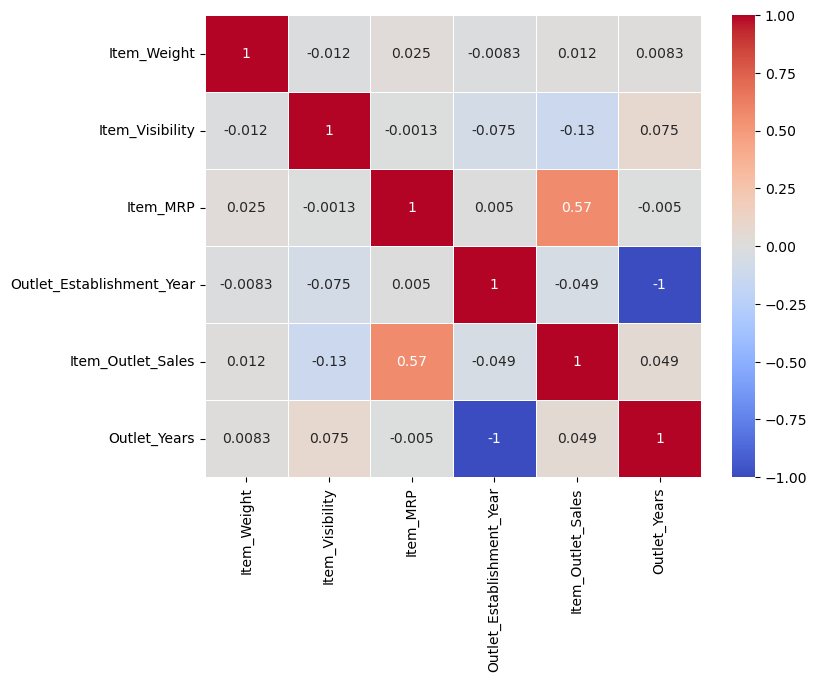

In [47]:
# Create a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

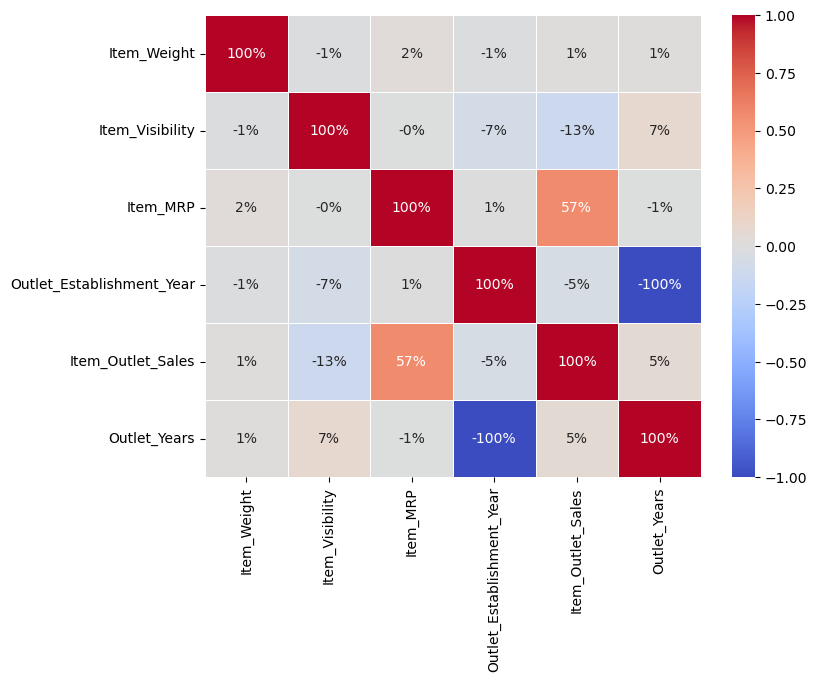

In [48]:
# Create a heatmap with percentage values
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.0%', cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

From heatmap, we can see that Item_Outlet_Sales and Item_MRP are aprroximately positively correlated with each other (0.57) and Outlet_Years and Outlet_Establishment_Year are negatively highly correlated (-1).

In [49]:
df = df.drop('Outlet_Establishment_Year', axis=1)

C:\Users\94774\AppData\Local\Temp\ipykernel_15116\3749504314.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



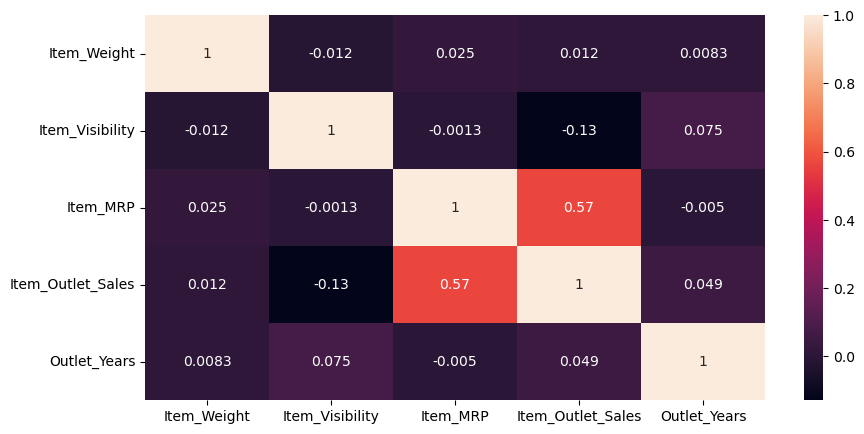

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [51]:
!pip install klib

In [52]:
import klib

GridSpec(6, 6)

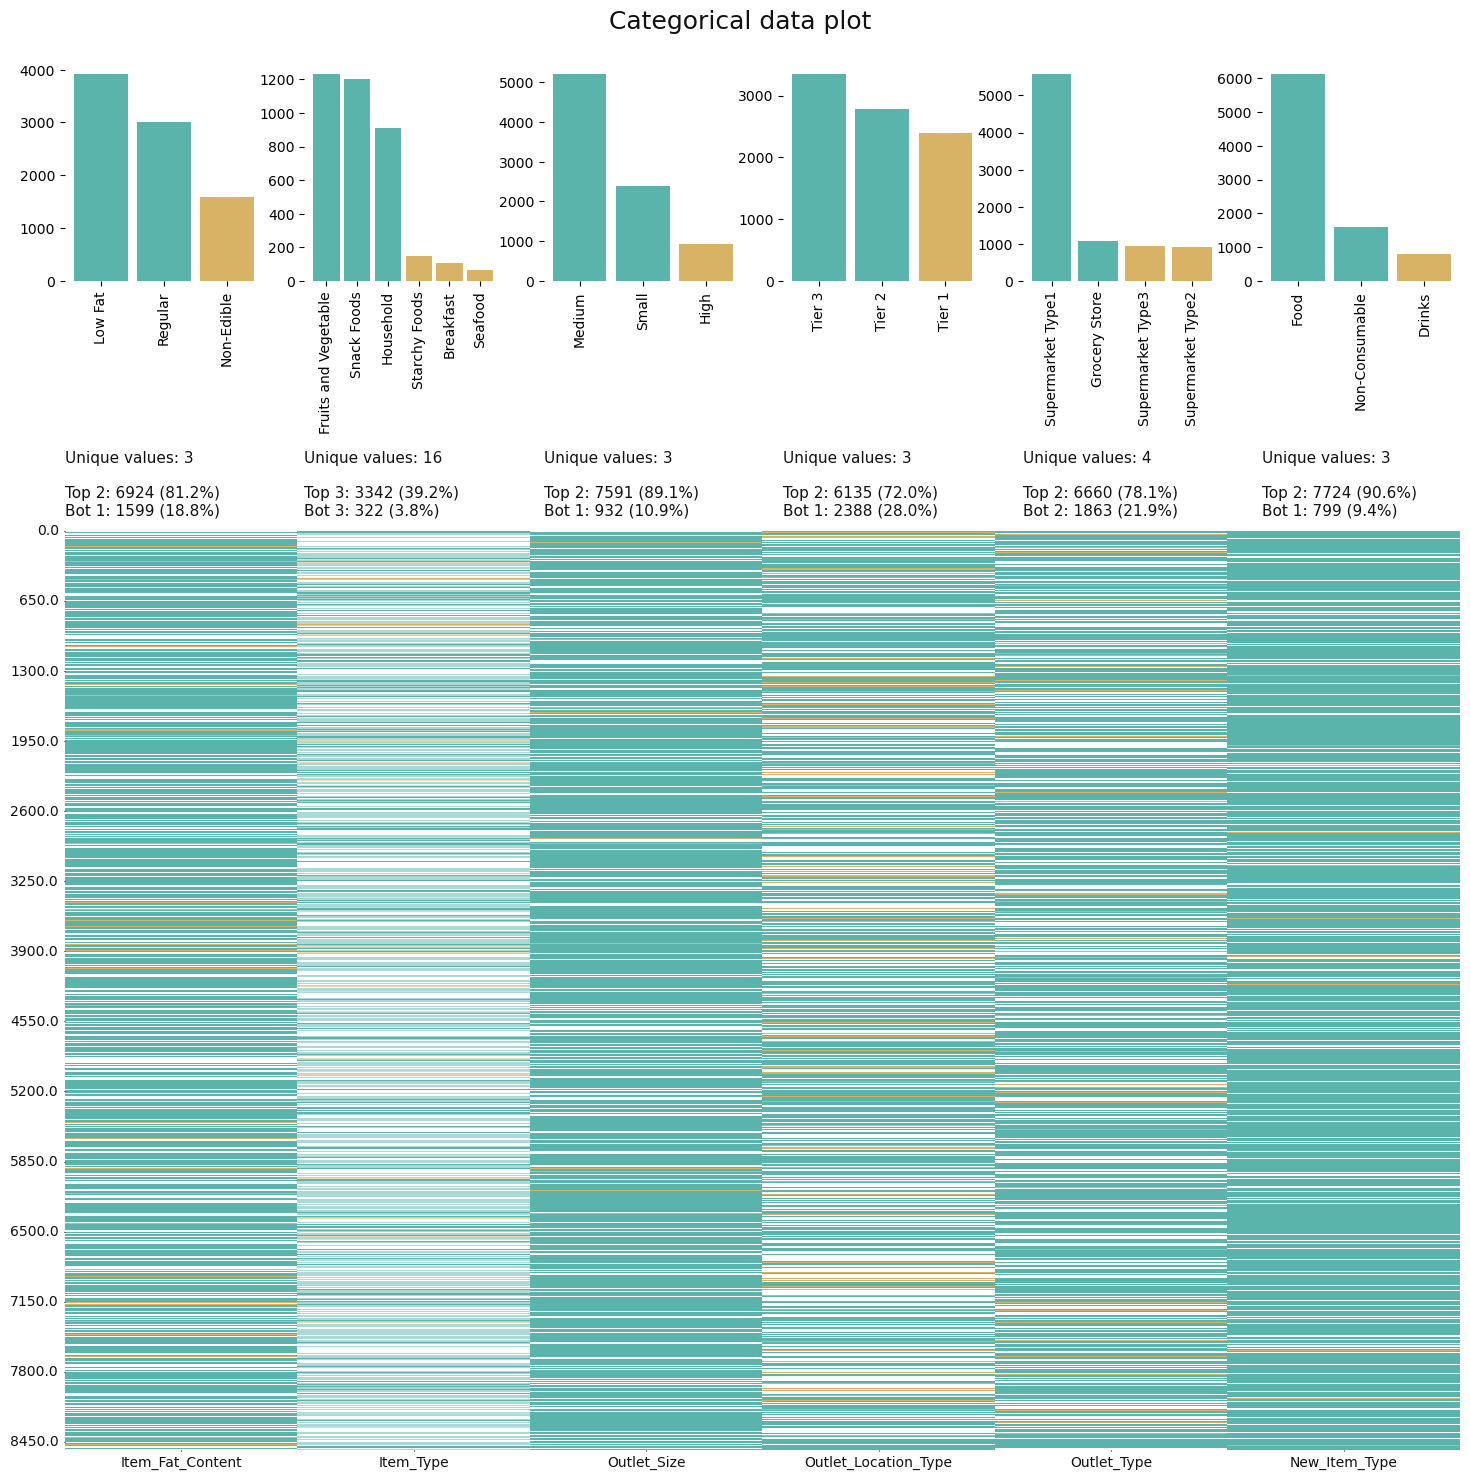

In [53]:
klib.cat_plot(df)

In [54]:
#correlation matrix
klib.corr_mat(df)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.00,-0.01,0.02,0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.13,0.07
Item_MRP,0.02,-0.00,1.00,0.57,-0.01
Item_Outlet_Sales,0.01,-0.13,0.57,1.00,0.05
Outlet_Years,0.01,0.07,-0.01,0.05,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

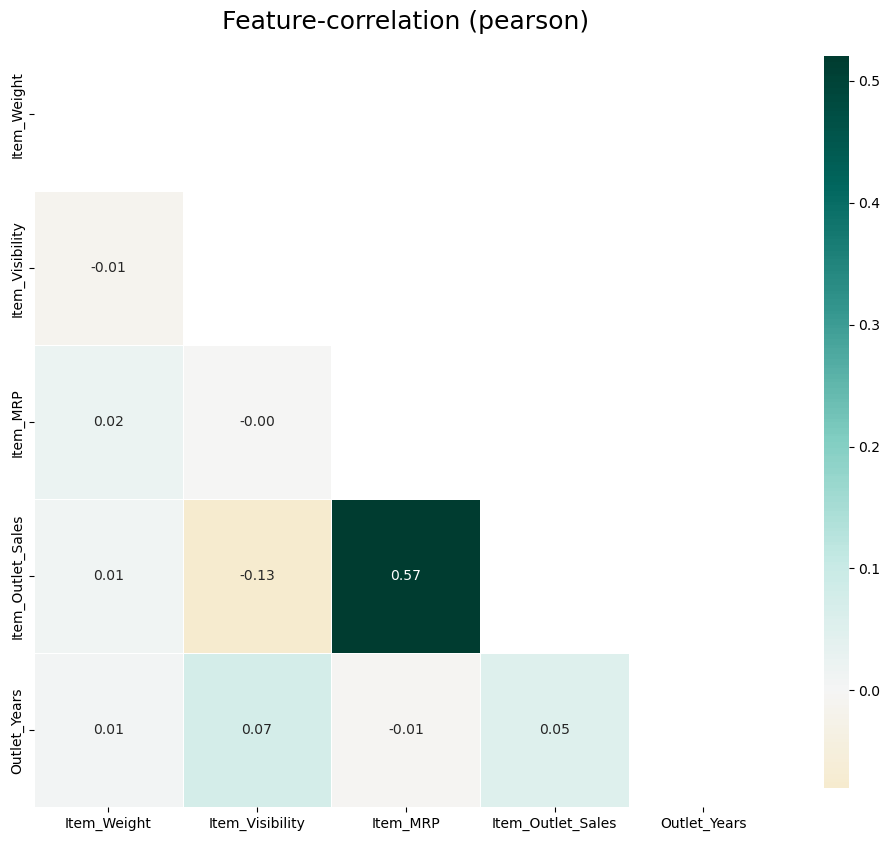

In [55]:
klib.corr_plot(df)

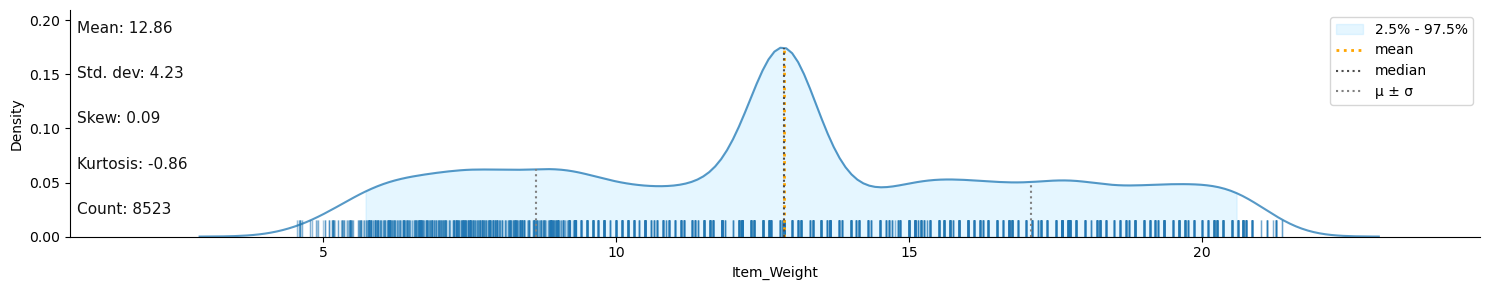

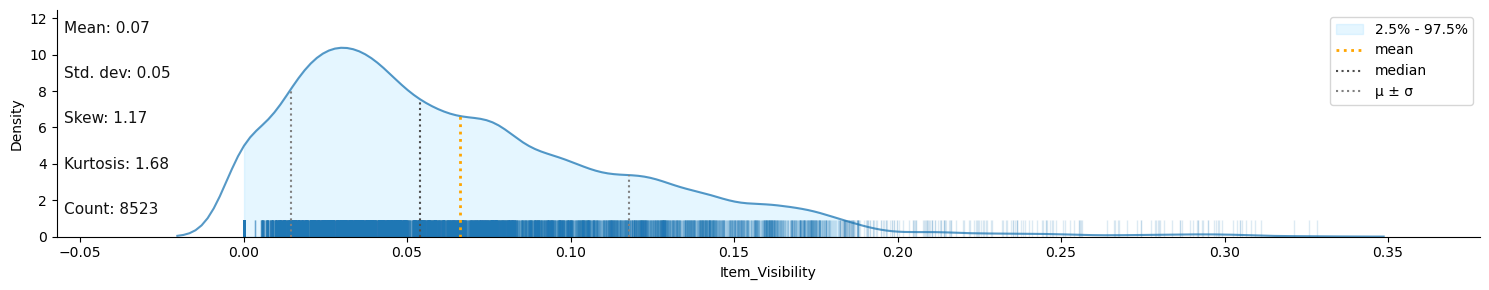

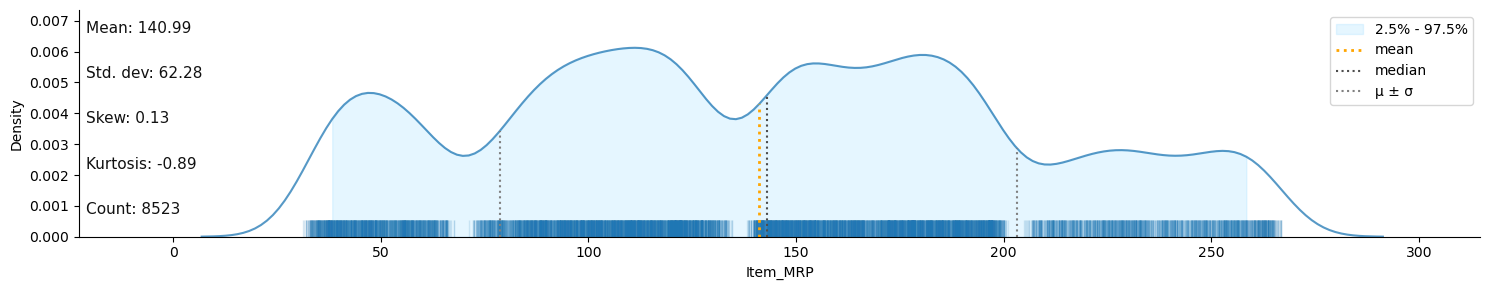

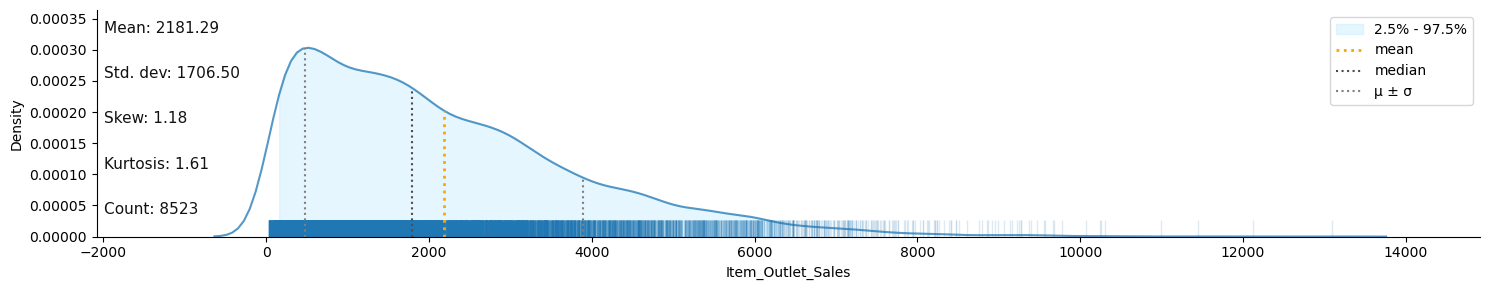

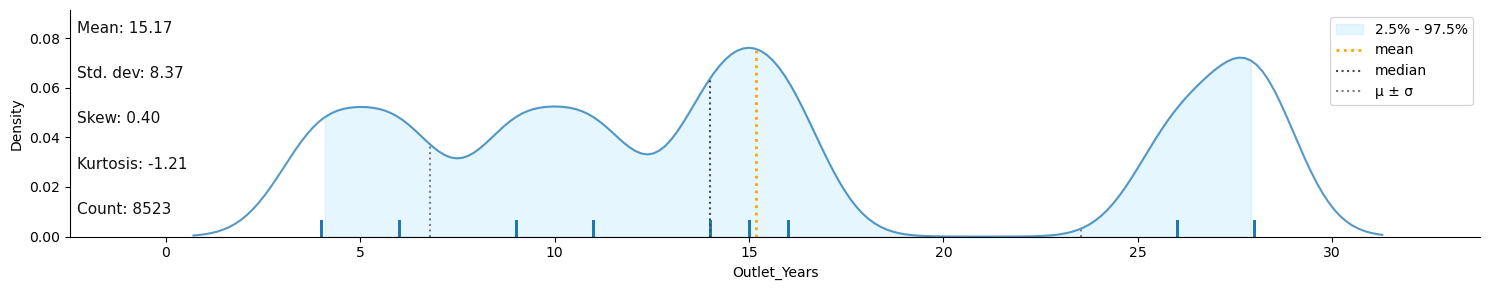

In [56]:
# Get the numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Create individual distribution plots for each numeric feature
for column in numeric_columns:
    klib.dist_plot(df[column])

In [57]:
klib.missingval_plot(df)

No missing values found in the dataset.


DATA CLEANING USING KLIB LIBRARY

In [58]:
# klib.clean - functions for cleaning datasets
# performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
klib.data_cleaning(df) 


Shape of cleaned data: (8523, 11) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.53 MB (-73.61%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,new_item_type,outlet_years
0,9.300000,Low Fat,0.016047,Dairy,249.809204,Medium,Tier 1,Supermarket Type1,3735.137939,Food,14
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,Medium,Tier 3,Supermarket Type2,443.422791,Drinks,4
2,17.500000,Low Fat,0.016760,Meat,141.617996,Medium,Tier 1,Supermarket Type1,2097.270020,Food,14
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,Medium,Tier 3,Grocery Store,732.380005,Food,15
4,8.930000,Non-Edible,0.000000,Household,53.861401,High,Tier 3,Supermarket Type1,994.705200,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,High,Tier 3,Supermarket Type1,2778.383301,Food,26
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,Medium,Tier 2,Supermarket Type1,549.284973,Food,11
8520,10.600000,Non-Edible,0.035186,Health and Hygiene,85.122398,Small,Tier 2,Supermarket Type1,1193.113647,Non-Consumable,9
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,Medium,Tier 3,Supermarket Type2,1845.597656,Food,4


In [59]:
# cleans and standardizes column names, also called inside data_cleaning()
klib.clean_column_names(df) 

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,new_item_type,outlet_years
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,8.930,Non-Edible,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,Food,11
8520,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable,9
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_weight           8523 non-null   float64
 1   item_fat_content      8523 non-null   object 
 2   item_visibility       8523 non-null   float64
 3   item_type             8523 non-null   object 
 4   item_mrp              8523 non-null   float64
 5   outlet_size           8523 non-null   object 
 6   outlet_location_type  8523 non-null   object 
 7   outlet_type           8523 non-null   object 
 8   item_outlet_sales     8523 non-null   float64
 9   new_item_type         8523 non-null   object 
 10  outlet_years          8523 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [61]:
 # converts existing to more efficient dtypes, also called inside data_cleaning()
df=klib.convert_datatypes(df) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   item_weight           8523 non-null   float32 
 1   item_fat_content      8523 non-null   category
 2   item_visibility       8523 non-null   float32 
 3   item_type             8523 non-null   category
 4   item_mrp              8523 non-null   float32 
 5   outlet_size           8523 non-null   category
 6   outlet_location_type  8523 non-null   category
 7   outlet_type           8523 non-null   category
 8   item_outlet_sales     8523 non-null   float32 
 9   new_item_type         8523 non-null   category
 10  outlet_years          8523 non-null   int8    
dtypes: category(6), float32(4), int8(1)
memory usage: 192.9 KB


In [62]:
# pools subset of cols based on duplicates with min. loss of information
klib.pool_duplicate_subsets(df) 

,item_visibility,item_mrp,item_outlet_sales,pooled_vars
0,0.016047,249.809204,3735.137939,0
1,0.019278,48.269199,443.422791,1
2,0.016760,141.617996,2097.270020,2
3,0.000000,182.095001,732.380005,3
4,0.000000,53.861401,994.705200,4
...,...,...,...,...
8518,0.056783,214.521805,2778.383301,8518
8519,0.046982,108.156998,549.284973,8519
8520,0.035186,85.122398,1193.113647,8520
8521,0.145221,103.133202,1845.597656,8521


Preprocessing Task before Model Building

Label encoding

In [63]:
df.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,new_item_type,outlet_years
0,9.300000,Low Fat,0.016047,Dairy,249.809204,Medium,Tier 1,Supermarket Type1,3735.137939,Food,14
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,Medium,Tier 3,Supermarket Type2,443.422791,Drinks,4
2,17.500000,Low Fat,0.016760,Meat,141.617996,Medium,Tier 1,Supermarket Type1,2097.270020,Food,14
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,Medium,Tier 3,Grocery Store,732.380005,Food,15
4,8.930000,Non-Edible,0.000000,Household,53.861401,High,Tier 3,Supermarket Type1,994.705200,Non-Consumable,26


In [64]:
from sklearn.preprocessing import LabelEncoder
Lab_En=LabelEncoder()

In [65]:
df=df.apply(Lab_En.fit_transform)

In [66]:
df

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,new_item_type,outlet_years
0,284,0,664,4,5592,1,0,1,2540,1,4
1,57,2,880,14,473,1,2,2,422,0,0
2,376,0,715,10,2901,1,0,1,1639,1,4
3,393,2,0,6,4227,1,2,0,670,1,5
4,265,1,0,9,627,0,2,1,865,2,7
...,...,...,...,...,...,...,...,...,...,...,...
8518,125,0,3912,13,4955,0,2,1,2047,1,7
8519,233,2,3278,0,2023,1,1,1,516,1,3
8520,299,1,2302,8,1263,2,1,1,1018,2,2
8521,149,2,7174,13,1857,1,2,2,1466,1,0


C:\Users\94774\AppData\Roaming\Python\Python310\site-packages\dtale\views.py:2110: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\94774\AppData\Roaming\Python\Python310\site-packages\dtale\views.py:2110: FutureWarning:

The default value of regex will change from True to False in a future version.

